# SMD Übungunszettel Nr. 7

Abgabe von: __Pape, Kusurmann und Becker__

In [22]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

np.random.seed(43)

## Aufgabe 19

### Aufgabenteil a)

## Aufgabe 20
Noch ein informativer [Link](http://www.cbcity.de/tutorial-neuronale-netze-einfach-erklaert)
### Aufgabenteil a)
Die _Lossfunktion_ ist ein Maß dafür wie viel Information/Wahrheit bei zum Beispiel einem Schnitt verloren geht.
Hier bei gibt es verschiedene Defintionen für eine Lossfunktion. Allgemein soll eine Operation die Lossfunktion minimieren, also die maximale Information/Wahrheit erhalten. Aus diesem Grund wird die Lossfunktion dazu verwendet, um den z.B. den geeignetes Schnitt aus einer Vielzahl von möglichen Schnitten zu ermittelt.

### Aufgabenteil b)
Durch ausprobieren oder durch das analytische bestimmen des Minimas. 

### Aufgabenteil c)
Die Aktivierungsfunktion steuert, unter Berücksichtigung des Inputs, wie aktiv das Neuron ist.
Hierbei muss der Input auch einen bestimmten Schwellwert überschreiten, bevor das Neuro überhaupt aktiviert wird.
Durch die Aktivierungsfunktion wird somit das erstmal schon mal Noise vom Signal getrennt? Die Aktivierungsfunktionen tragen auch zum _lernen_ des Netzwerks bei. Aktivierungsfunktion der letzten Neuronenebene muss zum gewünschten Output passen.
Beispiele:
- lineare Funktion
- Sigmoid Funktion
- Leaky ReLU

### Aufgabenteil d)
Man verwendete linerare Transformationen $f=\mathbf{W}x_i +  b$, um Daten zu klassifizieren. 
Hierbei ist $\mathbf{W}\in \mathbb{R}^{N\times M}$ die Dimensionalität der Matrix, gegeben durch die Anzahl der Eingangsneuronen $N$ und der Ausgangsneuronen $M$. Somit sind _Neuronen_ nichts anderes als die Dimensionalität der lineraten Transformationen. 


### Aufgabenteil e)
In der Bilderkennung werden Neuronalenetzwerke verwendet, weil hier die hohe Dimensionalität des Eingangssignals
verarbeitet und reduziert werden kann.

Aber auch bei der Klassufizeriung von Datenpunkte, da diese beliebege dimensionale Fitfunktionen annehmen können und somit Daten geschickt transformieren und dann fitten. 


## Aufgabe 21

### Aufgabenteil d)

In [2]:
pop_1 = pd.read_hdf('./populationen.hdf5', key='P_0')
pop_2 = pd.read_hdf('./populationen.hdf5', key='P_1')

pop_1['label'] = np.zeros(pop_1.shape[0])
pop_2['label'] = np.ones(pop_2.shape[0])

In [13]:
df_pop = pd.concat([pop_1, pop_2], ignore_index=True)

In [217]:
def soft_max(x_i, W, b):
    f = np.matmul( W, x_i[['x','y']].T).T + b
    q = (np.exp(f).T / np.sum(np.exp(f), axis=1).T).T 
    
    ''' Gebe einen Vektor Q zurück, hierbei ist q[0] die zu Klasse 1 zugehörige Softmax funktion 
        und q[1] bezüglich der Klasse 2
    '''
    
    return q

In [5]:
def indicator_function(x, grad_c):
    #grad_c.loc[grad_c['label']== 0, 'x'] = grad_c[grad_c['label']== 0] -1
    #grad_c.loc[ grad_c['label']== 1, 'y'] = grad_c[grad_c['label']== 1] -1
    # Hier bin ich mir auch nicht so sicher
    grad_c[x['label']== 0]= grad_c[x['label']== 0] - np.array([1,0])
    grad_c[x['label']== 1]= grad_c[x['label']== 1] - np.array([0,1]) # ziehe eine eins von den Elementen ab
    return grad_c

In [138]:
def gradient_cost_function(x, soft_max_f, indicator, W, b):
    m = x.shape[0]
    grad_c_i = soft_max_f(x, W, b)
    print(grad_c_i)
    grad_c_i = indicator(x, grad_c_i)
    return 1/m * sum(grad_c_i)

In [112]:
learning_rate = 0.5
periodes = 100

W = np.random.rand(2, 2)
b = np.random.rand(1, 2)
b

array([[0.40498945, 0.31609647]])

In [214]:
test = gradient_cost_function(df_pop, soft_max, indicator_function, W, b)

[[0.00586973 0.99413027]
 [0.04666773 0.95333227]
 [0.1636788  0.8363212 ]
 ...
 [0.10729733 0.89270267]
 [0.00873841 0.99126159]
 [0.02194765 0.97805235]]
0
[[1.55016887e-06 6.13150018e-05]
 [1.23247395e-05 5.87987023e-05]
 [4.32268422e-05 5.15818072e-05]
 ...
 [2.83367478e-05 5.50592486e-05]
 [2.30777624e-06 6.11380698e-05]
 [5.79627613e-06 6.03233635e-05]]


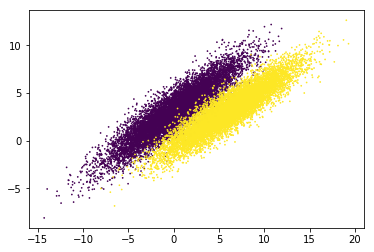

In [9]:
plt.scatter(df_pop['x'], df_pop['y'],s=0.5, c= df_pop['label'])

In [114]:
b = df_pop[['x','y']].values

In [41]:
np.matmul(W,a.T), np.dot(W,a.T)

(array([3.16991911, 3.48804281]), array([3.16991911, 3.48804281]))

In [111]:
w

NameError: name 'w' is not defined

In [99]:
b

array([[ 0.92661193,  4.71709205],
       [-3.95395284,  1.27447843],
       [-7.16169339, -0.98441497]])

In [95]:
a = np.array([[1,1], [1,-1], [1, 0]])

In [96]:
W = np.array( [[2, 1], [0, 1]])

In [124]:
print(W,'\n\n' , a.T.shape)

[[0.25442113 0.05688494]
 [0.86664864 0.221029  ]] 

 (2, 3)


In [137]:
np.matmul(W, b.T).T + np.array([8,0])

array([[ 8.50408113,  1.84566109],
       [ 7.06652949, -3.14499116],
       [ 6.12191552, -6.4242561 ],
       ...,
       [10.13107948,  7.37616555],
       [10.87889265, 10.00525514],
       [10.6993387 ,  9.36730538]])

In [122]:
b.T.shape, W.shape

((2, 20000), (2, 2))

In [142]:
test

array([-0.49995, -0.49995])